# Pune House Price Prediction

Importing necessary libraries

In [1]:
# Importing numpy for numerical operations
import numpy as np  

# Importing pandas for data manipulation and analysis
import pandas as pd 

# Importing matplotlib for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt 

# Importing seaborn for statistical data visualization, built on top of matplotlib
import seaborn as sns 

# Importing LinearRegression model from sklearn for building a linear regression model
from sklearn.linear_model import LinearRegression 

# Importing metrics from sklearn for evaluating model performance
from sklearn.metrics import mean_squared_error, r2_score 

# Importing train_test_split from sklearn for splitting data into training and testing sets
from sklearn.model_selection import train_test_split  


## Data Preprocessing

- ### Loading the Dataset:
  
Load the Pune house prices dataset into a pandas DataFrame.

In [2]:
data = pd.read_csv('pune_house_prices.csv',low_memory=False)
df=pd.DataFrame(data)
df.head()

,id,area,square_feet,num_bedrooms,num_bathrooms,year_built,has_garage,price
0,1,Viman Nagar,1521,1,1,2016,0,4315847
1,2,Kalyani Nagar,2957,1,2,2003,1,12861115
2,3,Pimpri-Chinchwad,2816,3,2,1993,0,8615274
3,4,Kalyani Nagar,2869,3,1,2000,1,5360008
4,5,Kalyani Nagar,1285,3,3,2012,0,6412778


In [3]:
df.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             100000 non-null  int64 
 1   area           100000 non-null  object
 2   square_feet    100000 non-null  int64 
 3   num_bedrooms   100000 non-null  int64 
 4   num_bathrooms  100000 non-null  int64 
 5   year_built     100000 non-null  int64 
 6   has_garage     100000 non-null  int64 
 7   price          100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB



In [4]:
#Counting the number of null values in each column
print("No. of null values: \n")
print(data.isnull().sum())
print()

No. of null values: 

id               0
area             0
square_feet      0
num_bedrooms     0
num_bathrooms    0
year_built       0
has_garage       0
price            0
dtype: int64



There are no null values so we don't need to drop any cols.

## Data Visualization

### Heatmap of Correlation Matrix

<Axes: >

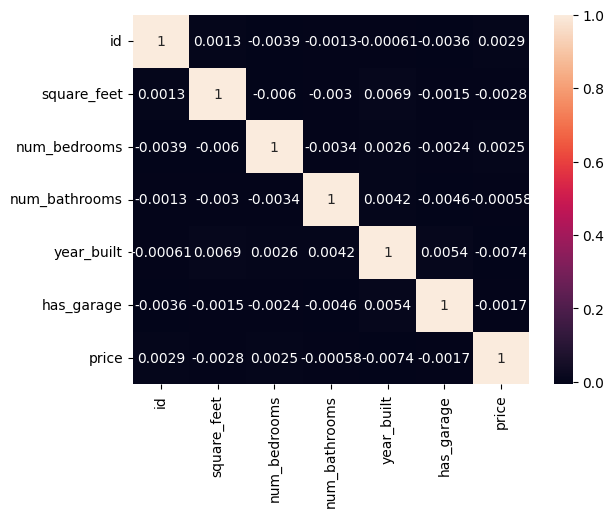

In [5]:
sns.heatmap(df[['id','square_feet','num_bedrooms','num_bathrooms','year_built','has_garage','price']].corr(),annot=True)

In [ ]:
# Define price ranges
bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000]
labels = ['0-500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M']

# Create a new column for price ranges
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, right=False)

# Count the number of houses in each price range
price_range_counts = df['price_range'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='viridis')
plt.title('Number of Houses in Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()
